In [11]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

# Import all modules needed for finding the best supervised learning model for classification and hyperparameter tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import joblib
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE

In [12]:
# Load the dataset
df = pd.read_csv('../data/processed/data_drop_processed.csv')
df.head()

,male,BPMeds,prevalentStroke,education_1,education_2,education_3,diabetes_stage_1,diabetes_stage_2,smoker_class_1,smoker_class_2,smoker_class_3,hypertension_stage_1,hypertension_stage_2,hypertension_stage_3,age,totChol,BMI,heartRate,MAP,TenYearCHD
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,-1.233351,-0.949714,0.291688,0.356340,-1.199371,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-0.415591,0.297729,0.724614,1.608289,-0.349343,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.181945,0.184325,-0.109261,-0.060977,-0.245934,0
3,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1.336754,-0.269291,0.687717,-0.895610,0.960513,1
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,-0.415591,1.091556,-0.660258,0.773656,-0.004644,0


In [13]:
# Store feature names in a list
features = df.columns[:-1]

# Store target variable in a separate dataframe
target = df[df.columns[-1]]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], target, test_size=0.2, random_state=42)

In [14]:
# SMOTE the training data
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [15]:
# Create a dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Multilayer Perceptron': MLPClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'XGBoost': xgb.XGBClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'KMeans': KMeans(n_clusters=2)
}

# Create a dictionary of hyperparameters
hyperparameters = {
    'Logistic Regression': {
        'clf__C': np.logspace(-4, 4, 20),
        'clf__penalty': ['l1', 'l2']
    },
    'Decision Tree': {
        'clf__max_depth': np.arange(1, 10),
        'clf__min_samples_split': np.arange(2, 10),
        'clf__min_samples_leaf': np.arange(1, 10)
    },
    'Random Forest': {
        'clf__n_estimators': np.arange(10, 100, 10),
        'clf__max_depth': np.arange(1, 10),
        'clf__min_samples_split': np.arange(2, 10),
        'clf__min_samples_leaf': np.arange(1, 10)
    },
    'Gradient Boosting': {
        'clf__n_estimators': np.arange(10, 100, 10),
        'clf__learning_rate': np.logspace(-4, 4, 20),
        'clf__max_depth': np.arange(1, 10),
        'clf__min_samples_split': np.arange(2, 10),
        'clf__min_samples_leaf': np.arange(1, 10)
    },
    'Support Vector Machine': {
        'clf__C': np.logspace(-4, 4, 20),
        'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'clf__degree': np.arange(1, 10)
    },
    'K-Nearest Neighbors': {
        'clf__n_neighbors': np.arange(1, 10),
        'clf__weights': ['uniform', 'distance'],
        'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'Gaussian Naive Bayes': {
        'clf__var_smoothing': np.logspace(0, -9, num=100)
    },
    'Multilayer Perceptron': {
        'clf__hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
        'clf__activation': ['tanh', 'relu'],
        'clf__solver': ['sgd', 'adam'],
        'clf__alpha': np.logspace(-5, 3, 5),
        'clf__learning_rate': ['constant', 'adaptive']
    },
    'Linear Discriminant Analysis': {
        'clf__solver': ['svd', 'lsqr', 'eigen']
    },
    'Quadratic Discriminant Analysis': {
        'clf__reg_param': np.logspace(0, -9, num=100)
    },
    'XGBoost': {
        'clf__n_estimators': np.arange(10, 100, 10),
        'clf__learning_rate': np.logspace(-4, 4, 20),
        'clf__max_depth': np.arange(1, 10),
        'clf__min_child_weight': np.arange(1, 10),
        'clf__subsample': np.linspace(0.1, 1, 10),
        'clf__colsample_bytree': np.linspace(0.1, 1, 10)
    },
    'LightGBM': {
        'clf__n_estimators': np.arange(10, 100, 10),
        'clf__learning_rate': np.logspace(-4, 4, 20),
        'clf__max_depth': np.arange(1, 10),
        'clf__num_leaves': np.arange(2, 100),
        'clf__min_child_samples': np.arange(1, 100),
        'clf__subsample': np.linspace(0.1, 1, 10),
        'clf__colsample_bytree': np.linspace(0.1, 1, 10)
    },
    'KMeans': {
        'clf__n_clusters': np.arange(2, 10)
    }
}

In [16]:
# Create a dictionary to store the results
results = {}

# Create a function to evaluate the best classifier with default hyperparameters and store the results in a dictionary (data is already scaled, so no need to include scaling in the pipeline)
def evaluate_classifier(name, classifier, X_train, y_train, X_test, y_test):
    # Create a pipeline with SMOTE of the training data
    pipe = Pipeline([
        ('clf', classifier)
    ])
    
    # Fit the model
    pipe.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipe.predict(X_test)
    
    # Get the probabilities
    try:
        y_prob = pipe.predict_proba(X_test)[:, 1]
    except AttributeError:
        y_prob = pipe.predict(X_test)
    
    # Get the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Get the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Get the classification report
    report = classification_report(y_test, y_pred)
    
    # Get the confusion matrix
    matrix = confusion_matrix(y_test, y_pred)
    
    # Get the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    
    # Get the precision score
    precision = matrix[1, 1] / (matrix[0, 1] + matrix[1, 1])
    
    # Get the recall score
    recall = matrix[1, 1] / (matrix[1, 0] + matrix[1, 1])
    
    # Store the results in a dictionary
    results[classifier] = {
        'name': name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'roc_auc': roc_auc,
        'report': report,
        'matrix': matrix,
        'fpr': fpr,
        'tpr': tpr,
        'model': pipe
    }
    
    # Print the results
    print(f'Classifier: {name}')
    print(f'Accuracy: {accuracy}')
    print(f'ROC AUC: {roc_auc}')
    print('Classification Report:')
    print(report)
    print('Confusion Matrix:')
    print(matrix)
    print('ROC Curve:')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.show()
    
    # plot the confusion matrix
    sns.heatmap(matrix, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()


Evaluating Logistic Regression
Classifier: Logistic Regression
Accuracy: 0.6639344262295082
ROC AUC: 0.6756382692824511
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.68      0.77       610
           1       0.27      0.61      0.38       122

    accuracy                           0.66       732
   macro avg       0.58      0.64      0.57       732
weighted avg       0.79      0.66      0.70       732

Confusion Matrix:
[[412 198]
 [ 48  74]]
ROC Curve:


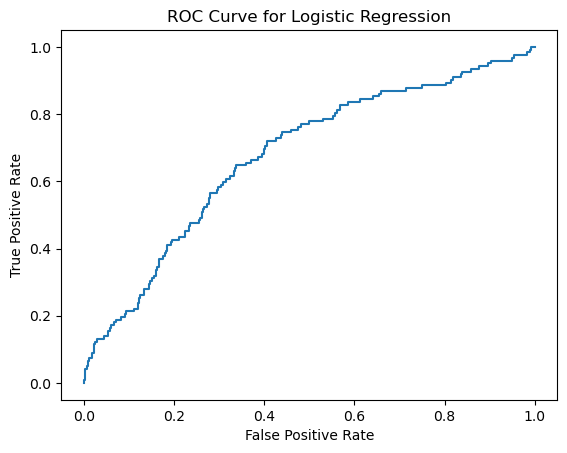

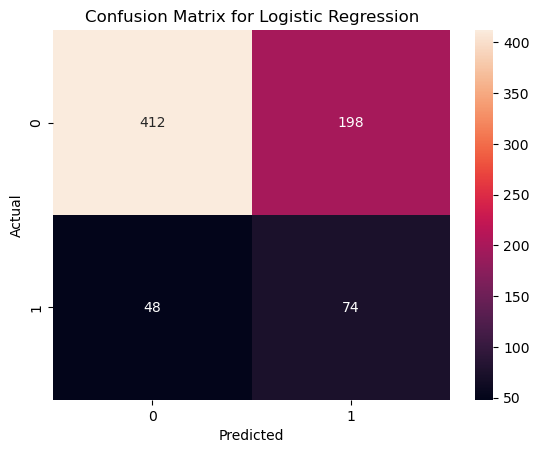

Evaluating Decision Tree
Classifier: Decision Tree
Accuracy: 0.6926229508196722
ROC AUC: 0.5270491803278688
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       610
           1       0.20      0.28      0.23       122

    accuracy                           0.69       732
   macro avg       0.52      0.53      0.52       732
weighted avg       0.74      0.69      0.71       732

Confusion Matrix:
[[473 137]
 [ 88  34]]
ROC Curve:


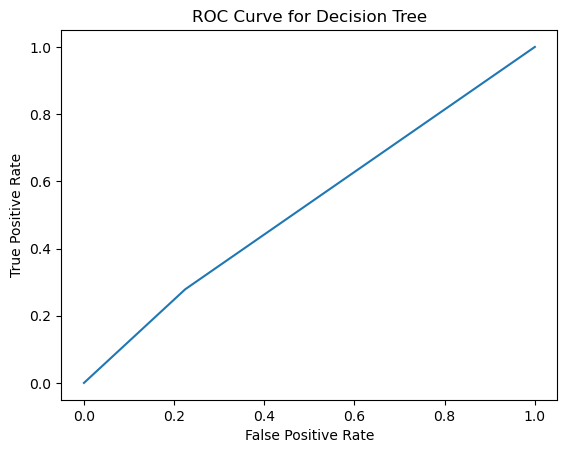

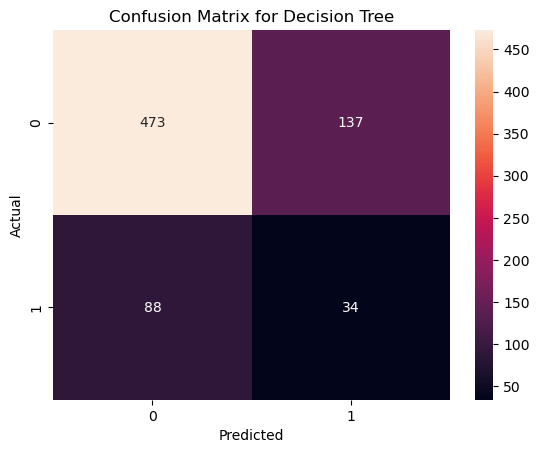

Evaluating Random Forest
Classifier: Random Forest
Accuracy: 0.7745901639344263
ROC AUC: 0.6644719161515721
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       610
           1       0.32      0.30      0.31       122

    accuracy                           0.77       732
   macro avg       0.59      0.59      0.59       732
weighted avg       0.77      0.77      0.77       732

Confusion Matrix:
[[530  80]
 [ 85  37]]
ROC Curve:


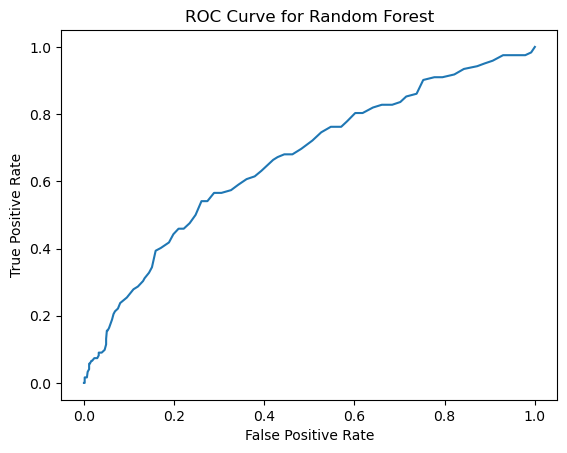

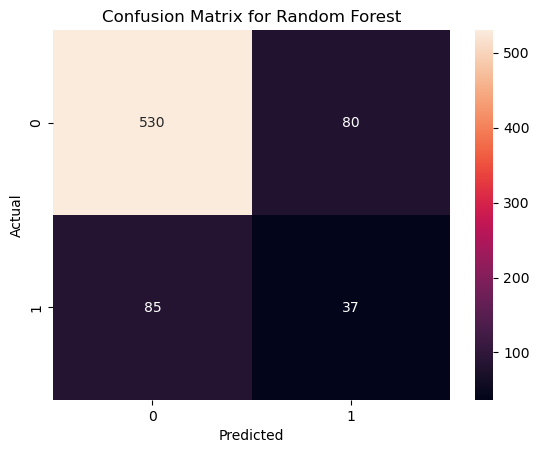

Evaluating Gradient Boosting
Classifier: Gradient Boosting
Accuracy: 0.73224043715847
ROC AUC: 0.6825853265251276
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       610
           1       0.31      0.51      0.39       122

    accuracy                           0.73       732
   macro avg       0.60      0.64      0.61       732
weighted avg       0.79      0.73      0.76       732

Confusion Matrix:
[[474 136]
 [ 60  62]]
ROC Curve:


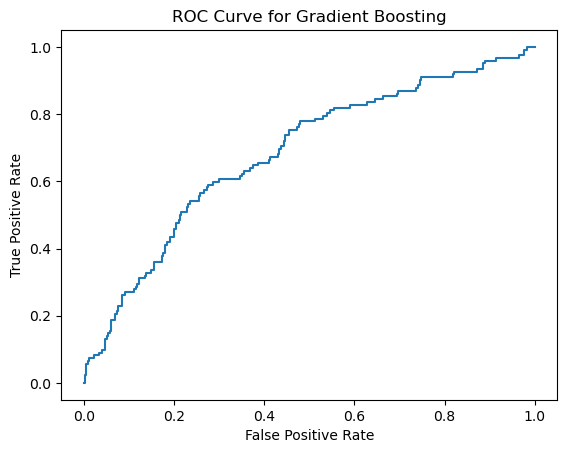

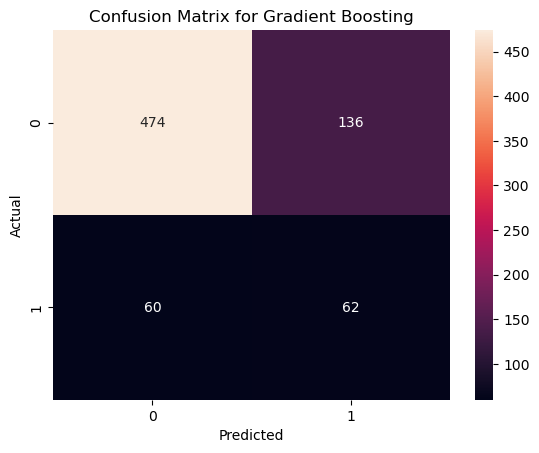

Evaluating Support Vector Machine
Classifier: Support Vector Machine
Accuracy: 0.6612021857923497
ROC AUC: 0.6473662993818866
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.70      0.78       610
           1       0.24      0.46      0.31       122

    accuracy                           0.66       732
   macro avg       0.55      0.58      0.54       732
weighted avg       0.76      0.66      0.70       732

Confusion Matrix:
[[428 182]
 [ 66  56]]
ROC Curve:


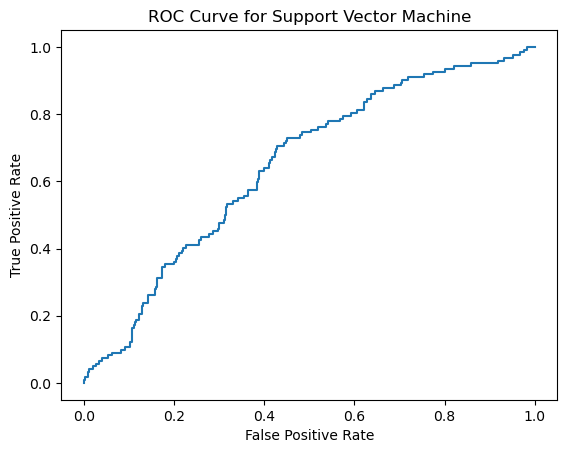

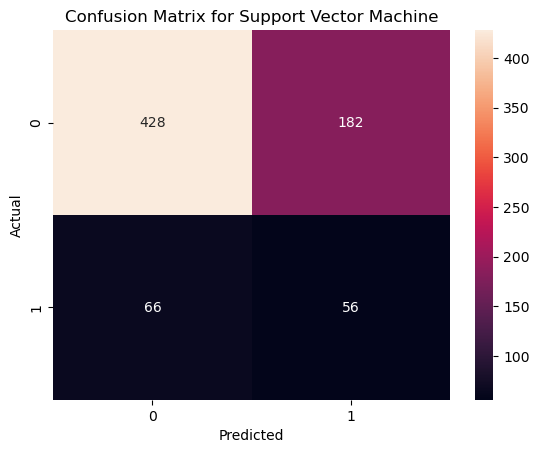

Evaluating K-Nearest Neighbors
Classifier: K-Nearest Neighbors
Accuracy: 0.6174863387978142
ROC AUC: 0.6031779091642031
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.64      0.74       610
           1       0.21      0.48      0.30       122

    accuracy                           0.62       732
   macro avg       0.54      0.56      0.52       732
weighted avg       0.75      0.62      0.66       732

Confusion Matrix:
[[393 217]
 [ 63  59]]
ROC Curve:


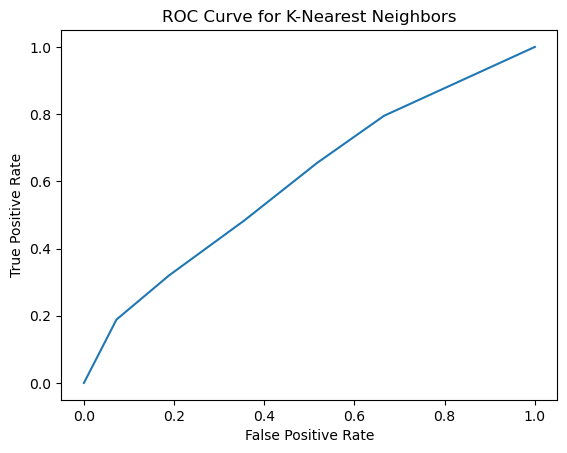

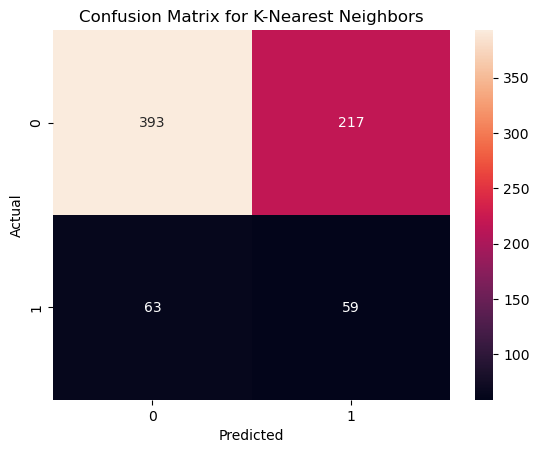

Evaluating Gaussian Naive Bayes
Classifier: Gaussian Naive Bayes
Accuracy: 0.6734972677595629
ROC AUC: 0.6701558720773986
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.69      0.78       610
           1       0.27      0.58      0.37       122

    accuracy                           0.67       732
   macro avg       0.58      0.64      0.58       732
weighted avg       0.79      0.67      0.71       732

Confusion Matrix:
[[422 188]
 [ 51  71]]
ROC Curve:


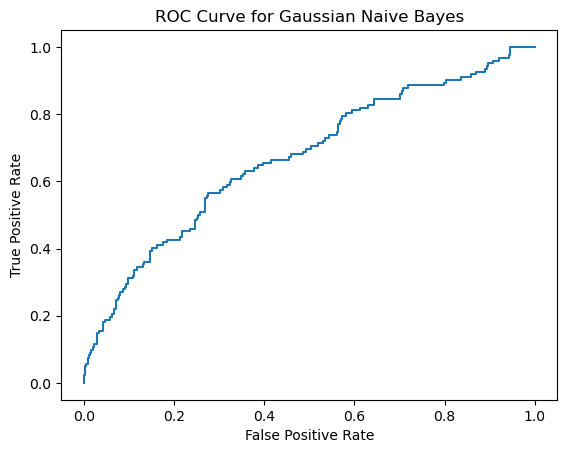

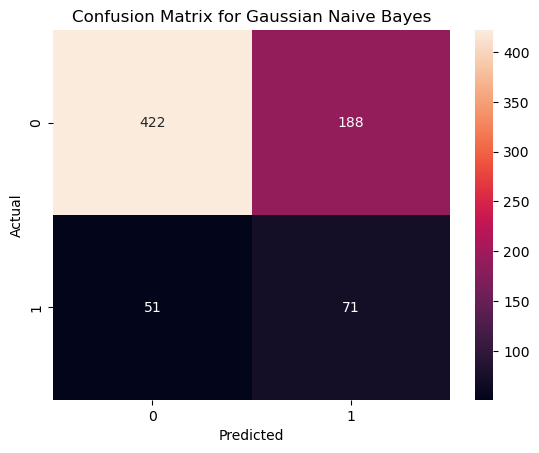

Evaluating Multilayer Perceptron
Classifier: Multilayer Perceptron
Accuracy: 0.6926229508196722
ROC AUC: 0.605697393173878
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       610
           1       0.22      0.32      0.26       122

    accuracy                           0.69       732
   macro avg       0.53      0.54      0.53       732
weighted avg       0.74      0.69      0.71       732

Confusion Matrix:
[[468 142]
 [ 83  39]]
ROC Curve:


/opt/anaconda3/envs/conda311/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


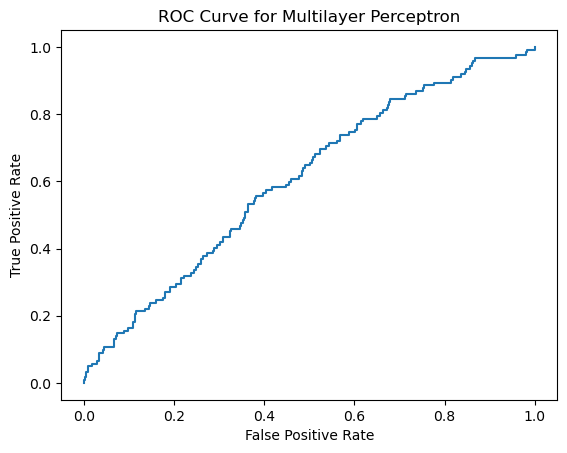

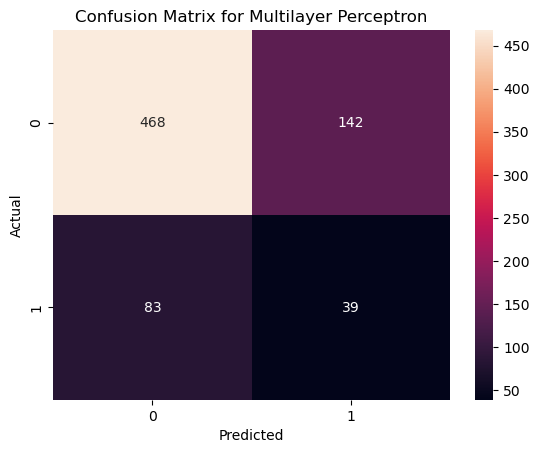

Evaluating Linear Discriminant Analysis
Classifier: Linear Discriminant Analysis
Accuracy: 0.6612021857923497
ROC AUC: 0.6725745767266864
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.67      0.77       610
           1       0.27      0.61      0.37       122

    accuracy                           0.66       732
   macro avg       0.58      0.64      0.57       732
weighted avg       0.79      0.66      0.70       732

Confusion Matrix:
[[410 200]
 [ 48  74]]
ROC Curve:


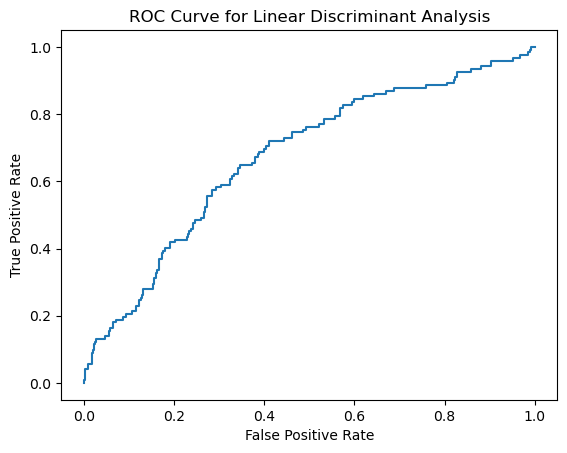

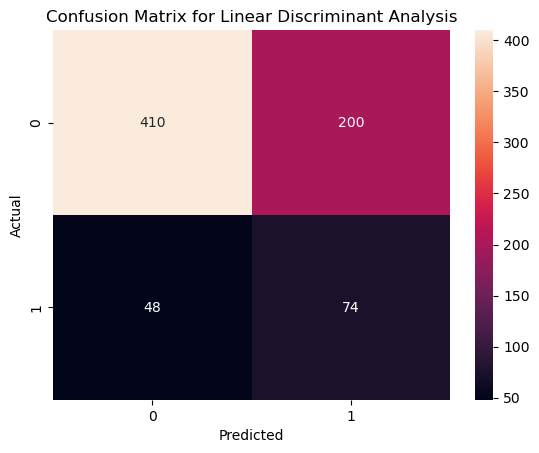

Evaluating Quadratic Discriminant Analysis
Classifier: Quadratic Discriminant Analysis
Accuracy: 0.6598360655737705
ROC AUC: 0.6615560333243751
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.67      0.77       610
           1       0.27      0.59      0.37       122

    accuracy                           0.66       732
   macro avg       0.58      0.63      0.57       732
weighted avg       0.79      0.66      0.70       732

Confusion Matrix:
[[411 199]
 [ 50  72]]
ROC Curve:


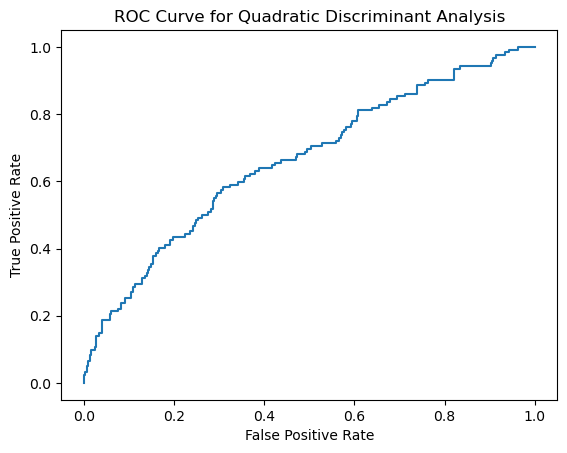

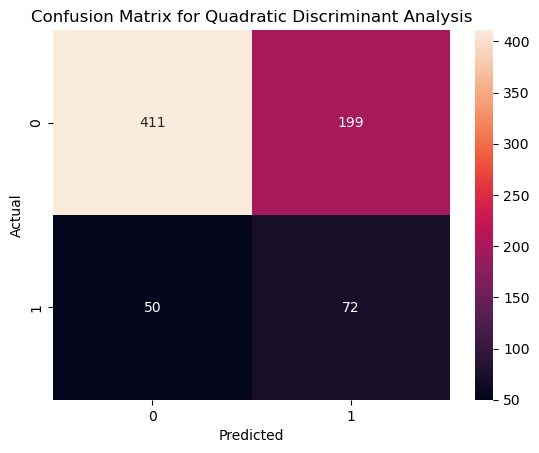

Evaluating XGBoost
Classifier: XGBoost
Accuracy: 0.8019125683060109
ROC AUC: 0.6294678849771567
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       610
           1       0.33      0.19      0.24       122

    accuracy                           0.80       732
   macro avg       0.59      0.56      0.56       732
weighted avg       0.76      0.80      0.78       732

Confusion Matrix:
[[564  46]
 [ 99  23]]
ROC Curve:


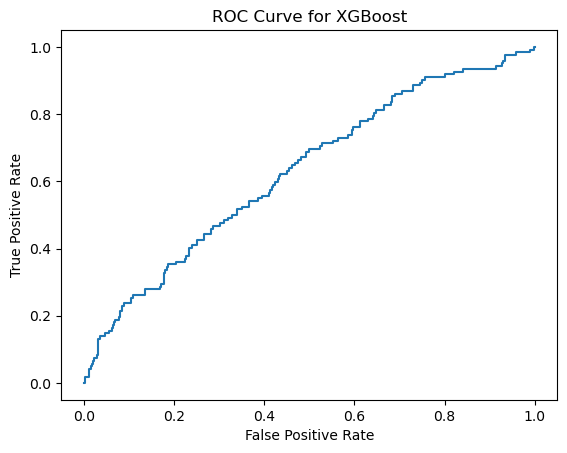

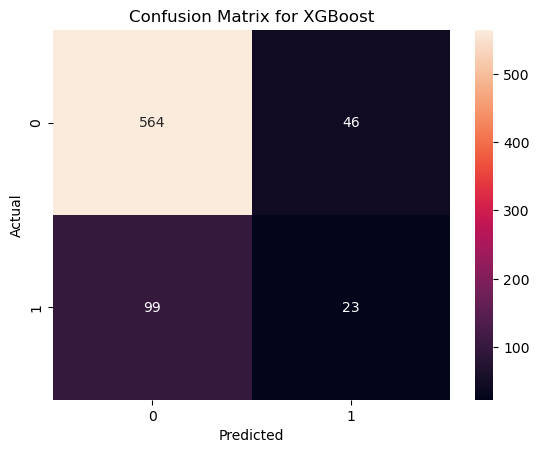

Evaluating LightGBM
Classifier: LightGBM
Accuracy: 0.8005464480874317
ROC AUC: 0.6462241332975006
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       610
           1       0.32      0.17      0.22       122

    accuracy                           0.80       732
   macro avg       0.58      0.55      0.55       732
weighted avg       0.76      0.80      0.78       732

Confusion Matrix:
[[565  45]
 [101  21]]
ROC Curve:


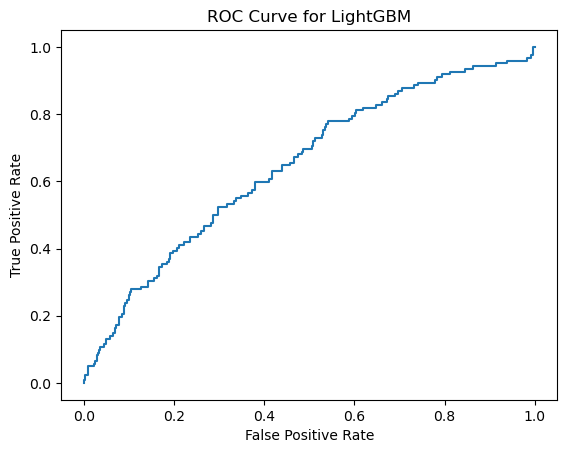

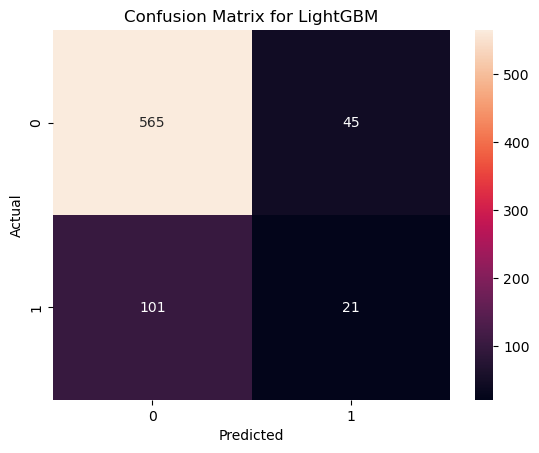

Evaluating KMeans


/opt/anaconda3/envs/conda311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Classifier: KMeans
Accuracy: 0.657103825136612
ROC AUC: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.66      0.76       610
           1       0.27      0.64      0.38       122

    accuracy                           0.66       732
   macro avg       0.59      0.65      0.57       732
weighted avg       0.80      0.66      0.70       732

Confusion Matrix:
[[403 207]
 [ 44  78]]
ROC Curve:


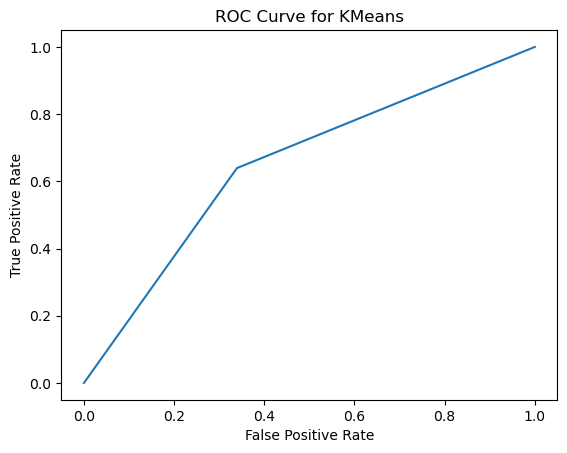

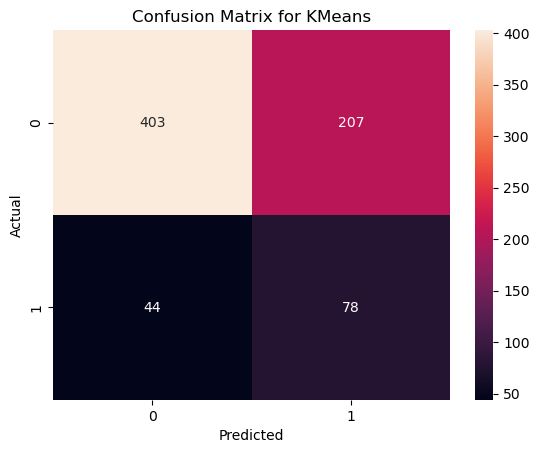

In [17]:
# Loop through the classifiers and evaluate them
for name, classifier in classifiers.items():
    print(f'Evaluating {name}')
    evaluate_classifier(name, classifier, X_train, y_train, X_test, y_test)

In [18]:
results_df = pd.DataFrame(results).T
results_df = results_df[['name', 'accuracy', 'precision', 'recall', 'roc_auc', 'model']].reset_index(drop=True).sort_values(by='recall', ascending=False).reset_index(drop=True)
results_df

,name,accuracy,precision,recall,roc_auc,model
0,KMeans,0.657104,0.273684,0.639344,0.65,(KMeans(n_clusters=2))
1,Logistic Regression,0.663934,0.272059,0.606557,0.675638,(LogisticRegression())
2,Linear Discriminant Analysis,0.661202,0.270073,0.606557,0.672575,(LinearDiscriminantAnalysis())
3,Quadratic Discriminant Analysis,0.659836,0.265683,0.590164,0.661556,(QuadraticDiscriminantAnalysis())
4,Gaussian Naive Bayes,0.673497,0.274131,0.581967,0.670156,(GaussianNB())
5,Gradient Boosting,0.73224,0.313131,0.508197,0.682585,(([DecisionTreeRegressor(criterion='friedman_m...
6,K-Nearest Neighbors,0.617486,0.213768,0.483607,0.603178,(KNeighborsClassifier())
7,Support Vector Machine,0.661202,0.235294,0.459016,0.647366,(SVC(probability=True))
8,Multilayer Perceptron,0.692623,0.21547,0.319672,0.605697,(MLPClassifier())
9,Random Forest,0.77459,0.316239,0.303279,0.664472,"((DecisionTreeClassifier(max_features='sqrt', ..."


In [19]:
# Find the best classifier based on recall
best_classifier = results_df.iloc[0]['name']
best_model = results_df['model'][0]
print(best_classifier)
print(best_model)


KMeans
Pipeline(steps=[('clf', KMeans(n_clusters=2))])


In [20]:
# Save the best model
joblib.dump(best_model, f'../models/{best_classifier}.pkl')

['../models/KMeans.pkl']

In [21]:
# Create a dictionary with all different hyperparameters for tuning KMeans
hyperparameters['KMeans'] = {
    'clf__n_clusters': np.arange(2, 10),
    'clf__init': ['k-means++', 'random'],
    'clf__n_init': np.arange(10, 100, 10),
    'clf__max_iter': np.arange(100, 1000, 100),
    'clf__tol': np.logspace(-4, -1, 10),
    'clf__algorithm': ['auto', 'full', 'elkan']
}

In [25]:
# Perform hyperparameter tuning on the best model using RandomizedSearchCV

# Create a RandomizedSearchCV object
search = RandomizedSearchCV(best_model, hyperparameters[best_classifier], n_iter=100, scoring='recall', n_jobs=-1, cv=5, random_state=42)

# Fit the model
search.fit(X_train, y_train)

# Get the best hyperparameters
best_hyperparameters = search.best_params_
print(best_hyperparameters)

# Get the best model
best_model = search.best_estimator_
print(best_model)

/opt/anaconda3/envs/conda311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/anaconda3/envs/conda311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/anaconda3/envs/conda311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/anaconda3/envs/conda311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/opt/anaconda3/envs/conda311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' i

{'clf__tol': 0.1, 'clf__n_init': 40, 'clf__n_clusters': 2, 'clf__max_iter': 200, 'clf__init': 'random', 'clf__algorithm': 'elkan'}
Pipeline(steps=[('clf',
                 KMeans(algorithm='elkan', init='random', max_iter=200,
                        n_clusters=2, n_init=40, tol=0.1))])


Classifier: KMeans tuned
Accuracy: 0.6516393442622951
ROC AUC: 0.6401639344262297
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.66      0.76       610
           1       0.27      0.62      0.37       122

    accuracy                           0.65       732
   macro avg       0.58      0.64      0.57       732
weighted avg       0.79      0.65      0.69       732

Confusion Matrix:
[[401 209]
 [ 46  76]]
ROC Curve:


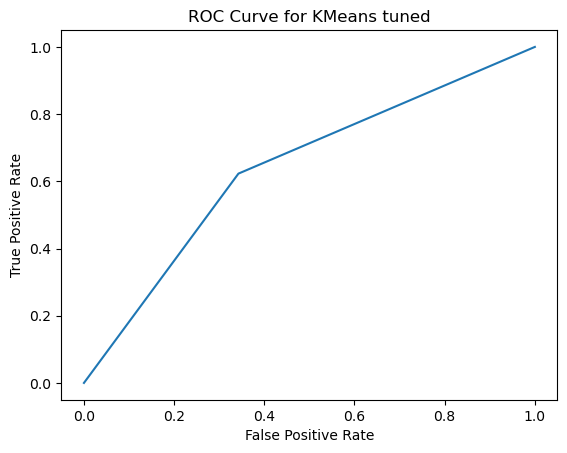

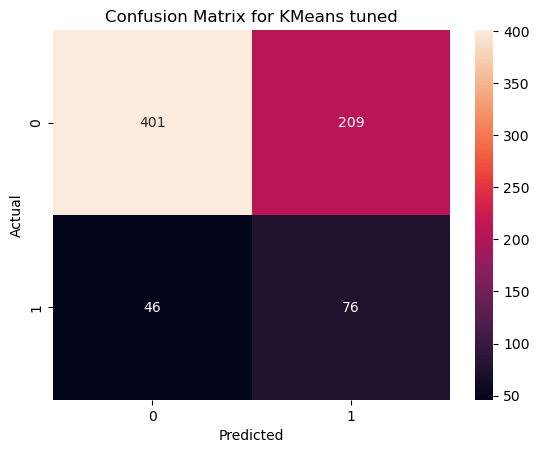

In [26]:
# Evaluate the best model with the best hyperparameters
evaluate_classifier('KMeans tuned', best_model, X_train, y_train, X_test, y_test)